In [ ]:
#import libraries
import cv2
import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
from tensorflow.keras.models import load_model

In [ ]:
# Load preprocessed numpy arrays for data and target
data = np.load('/content/drive/MyDrive/Colab Notebooks/rp/data-preprocessed-disease.npy')
target = np.load('/content/drive/MyDrive/Colab Notebooks/rp/target-preprocessed-disease.npy')

In [ ]:
# Load the pre-trained DenseNet121 model
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Freeze the layers in the base model
for layer in baseModel.layers:
    layer.trainable = False

In [ ]:
# Build the head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

In [ ]:
# Create the final model
model = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
# Compile the model
optimizer = Adam(learning_rate=0.003)
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Split the data into training and testing sets
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)


In [ ]:
#shape of test data
test_data.shape

(217, 224, 224, 3)

In [ ]:
# Define the model checkpoint
checkpoint = ModelCheckpoint('models/model-{epoch:03d}.model', monitor='val_loss', save_best_only=True, mode='auto')


In [ ]:
# Train the model
history = model.fit(train_data, train_target, validation_data=(test_data, test_target), epochs=80, batch_size=16, callbacks=[checkpoint])


Epoch 1/80
55/55 [==============================] - ETA: 0s - loss: 1.1441 - accuracy: 0.5762

55/55 [==============================] - 65s 913ms/step - loss: 1.1441 - accuracy: 0.5762 - val_loss: 0.7378 - val_accuracy: 0.7005
Epoch 2/80
54/55 [============================>.] - ETA: 0s - loss: 0.6735 - accuracy: 0.7326

55/55 [==============================] - 45s 834ms/step - loss: 0.6721 - accuracy: 0.7333 - val_loss: 0.4909 - val_accuracy: 0.7926
Epoch 3/80
54/55 [============================>.] - ETA: 0s - loss: 0.4572 - accuracy: 0.8090

55/55 [==============================] - 45s 824ms/step - loss: 0.4571 - accuracy: 0.8083 - val_loss: 0.4122 - val_accuracy: 0.8433
Epoch 4/80
54/55 [============================>.] - ETA: 0s - loss: 0.4029 - accuracy: 0.8495

55/55 [==============================] - 45s 836ms/step - loss: 0.4059 - accuracy: 0.8476 - val_loss: 0.3806 - val_accuracy: 0.8618
Epoch 5/80
55/55 [==============================] - 4s 80ms/step - loss: 0.3526 - accuracy: 0.8649 - val_loss: 0.4219 - val_accuracy: 0.8157
Epoch 6/80
55/55 [==============================] - 4s 65ms/step - loss: 0.2765 - accuracy: 0.8949 - val_loss: 0.4070 - val_accuracy: 0.8157
Epoch 7/80
55/55 [==============================] - 4s 65ms/step - loss: 0.2900 - accuracy: 0.8764 - val_loss: 0.3809 - val_accuracy: 0.8295
Epoch 8/80
54/55 [============================>.] - ETA: 0s - loss: 0.2567 - accuracy: 0.9074

55/55 [==============================] - 46s 843ms/step - loss: 0.2568 - accuracy: 0.9076 - val_loss: 0.3393 - val_accuracy: 0.8387
Epoch 9/80
54/55 [============================>.] - ETA: 0s - loss: 0.2526 - accuracy: 0.9144

55/55 [==============================] - 46s 843ms/step - loss: 0.2526 - accuracy: 0.9145 - val_loss: 0.3245 - val_accuracy: 0.8525
Epoch 10/80
55/55 [==============================] - 4s 67ms/step - loss: 0.1954 - accuracy: 0.9261 - val_loss: 0.3265 - val_accuracy: 0.8479
Epoch 11/80
54/55 [============================>.] - ETA: 0s - loss: 0.2022 - accuracy: 0.9086

55/55 [==============================] - 46s 852ms/step - loss: 0.2023 - accuracy: 0.9088 - val_loss: 0.3086 - val_accuracy: 0.8848
Epoch 12/80
55/55 [==============================] - 4s 67ms/step - loss: 0.1253 - accuracy: 0.9630 - val_loss: 0.3114 - val_accuracy: 0.8756
Epoch 13/80
54/55 [============================>.] - ETA: 0s - loss: 0.1301 - accuracy: 0.9537

55/55 [==============================] - 46s 846ms/step - loss: 0.1299 - accuracy: 0.9538 - val_loss: 0.2715 - val_accuracy: 0.8802
Epoch 14/80
54/55 [============================>.] - ETA: 0s - loss: 0.1085 - accuracy: 0.9653

55/55 [==============================] - 46s 852ms/step - loss: 0.1083 - accuracy: 0.9654 - val_loss: 0.2647 - val_accuracy: 0.8848
Epoch 15/80
54/55 [============================>.] - ETA: 0s - loss: 0.1015 - accuracy: 0.9688

55/55 [==============================] - 45s 837ms/step - loss: 0.1027 - accuracy: 0.9677 - val_loss: 0.2509 - val_accuracy: 0.9032
Epoch 16/80
55/55 [==============================] - 4s 70ms/step - loss: 0.1276 - accuracy: 0.9561 - val_loss: 0.2711 - val_accuracy: 0.8940
Epoch 17/80
55/55 [==============================] - 4s 81ms/step - loss: 0.1234 - accuracy: 0.9630 - val_loss: 0.2721 - val_accuracy: 0.8802
Epoch 18/80
55/55 [==============================] - 4s 67ms/step - loss: 0.0938 - accuracy: 0.9711 - val_loss: 0.2750 - val_accuracy: 0.8894
Epoch 19/80
54/55 [============================>.] - ETA: 0s - loss: 0.0935 - accuracy: 0.9618

55/55 [==============================] - 45s 827ms/step - loss: 0.0933 - accuracy: 0.9619 - val_loss: 0.2378 - val_accuracy: 0.8940
Epoch 20/80
55/55 [==============================] - 5s 82ms/step - loss: 0.0691 - accuracy: 0.9827 - val_loss: 0.2610 - val_accuracy: 0.8894
Epoch 21/80
55/55 [==============================] - 4s 78ms/step - loss: 0.0541 - accuracy: 0.9850 - val_loss: 0.3577 - val_accuracy: 0.8756
Epoch 22/80
55/55 [==============================] - 4s 78ms/step - loss: 0.0506 - accuracy: 0.9896 - val_loss: 0.2496 - val_accuracy: 0.9032
Epoch 23/80
55/55 [==============================] - 4s 70ms/step - loss: 0.0720 - accuracy: 0.9781 - val_loss: 0.3555 - val_accuracy: 0.8710
Epoch 24/80
55/55 [==============================] - 4s 78ms/step - loss: 0.0625 - accuracy: 0.9850 - val_loss: 0.2585 - val_accuracy: 0.8940
Epoch 25/80
55/55 [==============================] - 4s 68ms/step - loss: 0.0340 - accuracy: 0.9942 - val_loss: 0.2644 - val_accuracy: 0.8940
Epoch 26/80
55/5

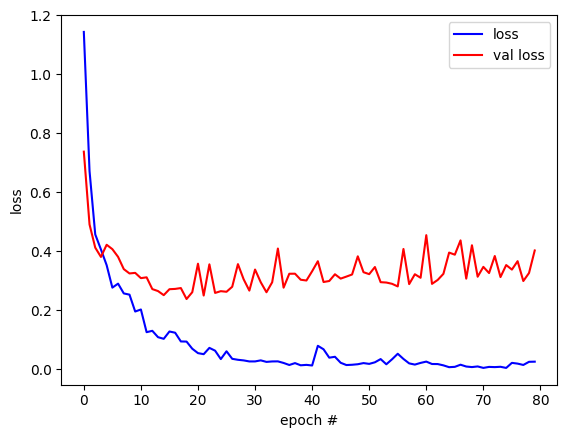

In [ ]:
# Plot the training history
plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r', label='val loss')
plt.legend()
plt.xlabel('epoch #')
plt.ylabel('loss')
plt.show()


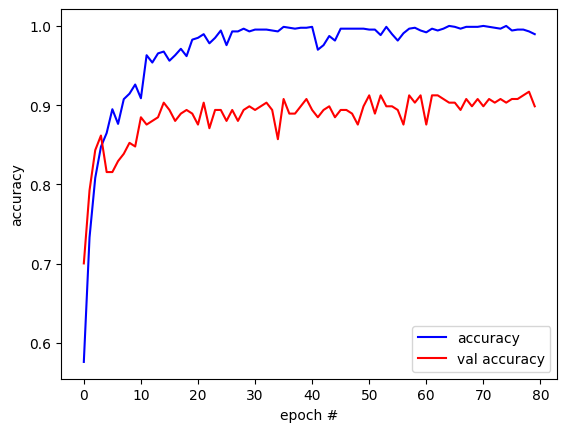

In [ ]:
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], 'b', label='accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='val accuracy')
plt.legend()
plt.xlabel('epoch #')
plt.ylabel('accuracy')
plt.show()


In [ ]:
# Evaluate the model on the testing set
print(model.evaluate(test_data, test_target))

7/7 [==============================] - 5s 428ms/step - loss: 0.4025 - accuracy: 0.8986
[0.40252137184143066, 0.8986175060272217]


In [ ]:
# Save the model
model.save('DenseNet121.h5')

In [ ]:
predicted_target=model.predict(test_data)

7/7 [==============================] - 3s 99ms/step


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1),target_names=['Black Mould', 'Cobweb', 'Mite', 'Green Mold', 'Bacterial blotch','Healthy']))

                  precision    recall  f1-score   support

     Black Mould       0.81      0.93      0.87        46
          Cobweb       0.85      0.79      0.81        14
            Mite       0.91      1.00      0.95        42
      Green Mold       0.93      0.75      0.83        57
Bacterial blotch       0.85      1.00      0.92        11
         Healthy       0.98      0.96      0.97        47

        accuracy                           0.90       217
       macro avg       0.89      0.91      0.89       217
    weighted avg       0.90      0.90      0.90       217



In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

matrix=confusion_matrix(np.argmax(test_target,axis=1),np.argmax(predicted_target,axis=1))
print(matrix)

[[43  0  1  2  0  0]
 [ 0 11  0  1  1  1]
 [ 0  0 42  0  0  0]
 [10  1  3 43  0  0]
 [ 0  0  0  0 11  0]
 [ 0  1  0  0  1 45]]


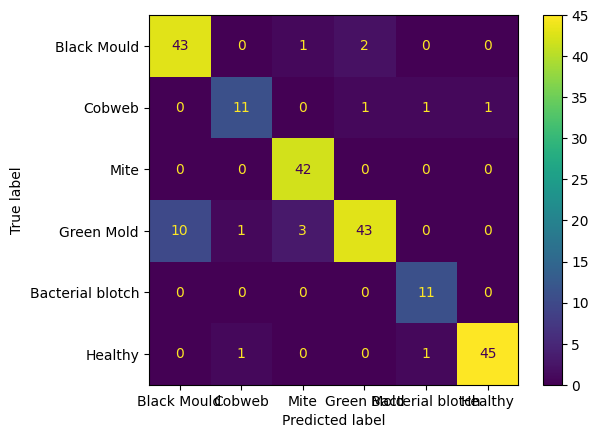

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=['Black Mould', 'Cobweb', 'Mite', 'Green Mold', 'Bacterial blotch', 'Healthy'])
disp.plot()